In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [66]:
df = pd.read_csv("winequality-white.csv", sep=r'\s*;\s*')

C:\Users\Grazy_nuy0zq9\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [67]:
df.head()

,"""fixed acidity""","""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [68]:
df = pd.read_csv('winequality-white.csv', 
                        names=['Fixed Acidity', 
                               'Volatile Acidity', 
                               'Citric Acid', 
                               'Residual Sugar', 
                               'Chlorides', 
                               'Free Sulfur Dioxide', 
                               'Total Sulfur Dioxide', 
                               'Density', 
                               'pH', 
                               'Sulphates', 
                               'Alcohol', 
                               'Quality'
                              ],
                        skiprows=1,
                        sep=r'\s*;\s*', engine='python')

In [69]:
df.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [70]:
df_small =df.drop(columns='Quality')

# Part 1: Data Preprocessing

In [71]:
df_small.dtypes

Fixed Acidity           float64
Volatile Acidity        float64
Citric Acid             float64
Residual Sugar          float64
Chlorides               float64
Free Sulfur Dioxide     float64
Total Sulfur Dioxide    float64
Density                 float64
pH                      float64
Sulphates               float64
Alcohol                 float64
dtype: object

In [72]:
df_small.isnull().sum()

Fixed Acidity           0
Volatile Acidity        0
Citric Acid             0
Residual Sugar          0
Chlorides               0
Free Sulfur Dioxide     0
Total Sulfur Dioxide    0
Density                 0
pH                      0
Sulphates               0
Alcohol                 0
dtype: int64

In [73]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed Acidity         4898 non-null   float64
 1   Volatile Acidity      4898 non-null   float64
 2   Citric Acid           4898 non-null   float64
 3   Residual Sugar        4898 non-null   float64
 4   Chlorides             4898 non-null   float64
 5   Free Sulfur Dioxide   4898 non-null   float64
 6   Total Sulfur Dioxide  4898 non-null   float64
 7   Density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   Sulphates             4898 non-null   float64
 10  Alcohol               4898 non-null   float64
dtypes: float64(11)
memory usage: 421.0 KB


In [74]:
df_small.isna().any()

Fixed Acidity           False
Volatile Acidity        False
Citric Acid             False
Residual Sugar          False
Chlorides               False
Free Sulfur Dioxide     False
Total Sulfur Dioxide    False
Density                 False
pH                      False
Sulphates               False
Alcohol                 False
dtype: bool

In [75]:
df['count'] = 1
x = df.groupby(['Quality']).count()['count'].sort_values(ascending=False)
x

Quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [76]:
array = [3,4,9,8]
df_small = df.loc[df['Quality'].isin(array)]
df_small.shape

(363, 13)

# Part 2: Data Evaluation

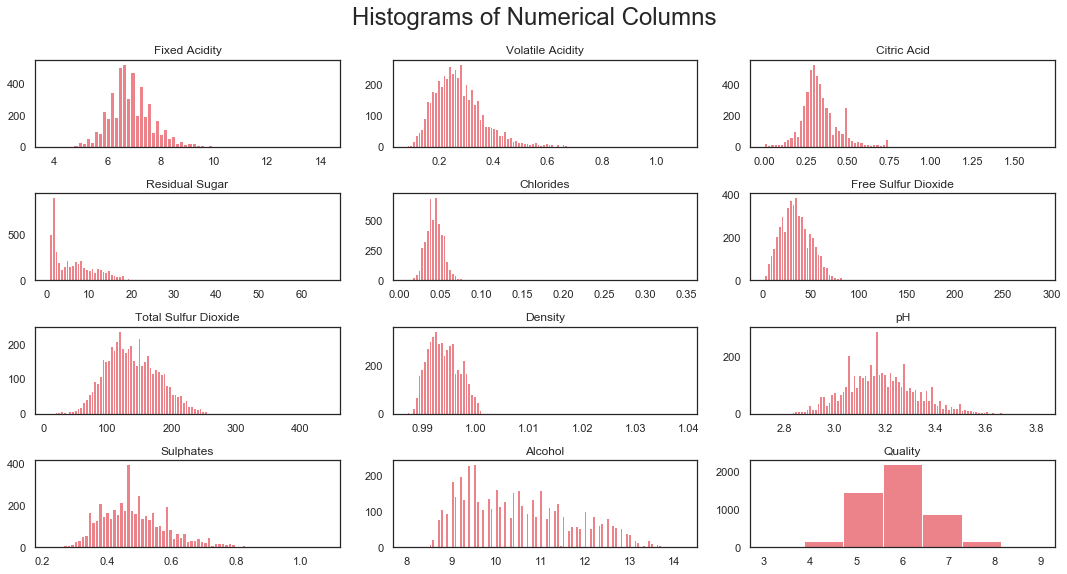

In [77]:
df2 = df[['Fixed Acidity', 
                               'Volatile Acidity', 
                               'Citric Acid', 
                               'Residual Sugar', 
                               'Chlorides', 
                               'Free Sulfur Dioxide', 
                               'Total Sulfur Dioxide', 
                               'Density', 
                               'pH', 
                               'Sulphates', 
                               'Alcohol', 
                               'Quality']]

#Histogram:
    
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",
             fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(df2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df2.columns.values[i])

    vals = np.size(df2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df2.iloc[:, i], bins=vals, color = '#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [78]:
df.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality,count
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.0
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,1.0
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,0.0
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.0
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,1.0
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,1.0
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,1.0
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,1.0


In [79]:
df_small.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality,count
count,363.00000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.0
mean,6.93168,0.327383,0.317851,5.221350,0.044336,31.589532,128.075758,0.993288,3.202121,0.480771,10.906198,5.942149,1.0
std,1.04639,0.150597,0.127079,4.299271,0.023218,25.230777,49.900569,0.002853,0.161218,0.132300,1.371563,2.086384,0.0
min,3.90000,0.110000,0.000000,0.700000,0.013000,3.000000,10.000000,0.987130,2.830000,0.250000,8.000000,3.000000,1.0
25%,6.30000,0.230000,0.260000,1.600000,0.033000,15.500000,96.000000,0.991000,3.080000,0.380000,9.800000,4.000000,1.0
50%,6.90000,0.290000,0.310000,3.900000,0.040000,29.000000,121.000000,0.993000,3.190000,0.460000,11.000000,4.000000,1.0
75%,7.40000,0.380000,0.370000,7.900000,0.050000,40.000000,155.000000,0.995115,3.310000,0.565000,12.100000,8.000000,1.0
max,11.80000,1.100000,0.880000,17.550000,0.290000,289.000000,440.000000,1.000600,3.720000,0.950000,14.000000,9.000000,1.0


In [80]:
df2 = df_small[['Fixed Acidity', 
                               'Volatile Acidity', 
                               'Citric Acid', 
                               'Residual Sugar', 
                               'Chlorides', 
                               'Free Sulfur Dioxide', 
                               'Total Sulfur Dioxide', 
                               'Density', 
                               'pH', 
                               'Sulphates', 
                               'Alcohol']]

correlations = df2.corrwith(df.Quality)
correlations = correlations[correlations!=1]
positive_correlations = correlations[
correlations >0].sort_values(ascending = False)
negative_correlations =correlations[
correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 Alcohol                0.534733
Free Sulfur Dioxide    0.168024
pH                     0.119367
Residual Sugar         0.081333
Citric Acid            0.077151
Sulphates              0.035790
dtype: float64

Most Negative Correlations: 
 Total Sulfur Dioxide   -0.066052
Fixed Acidity          -0.244632
Chlorides              -0.275887
Volatile Acidity       -0.315099
Density                -0.377651
dtype: float64


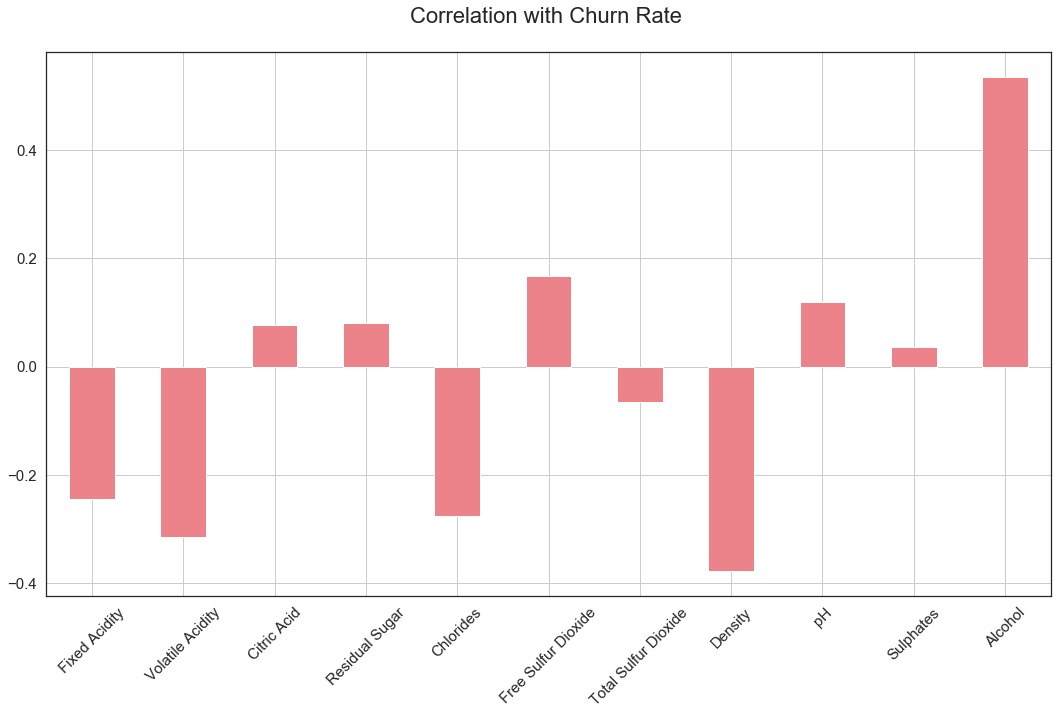

In [81]:
#Plot positive & negative correlations
correlations = df2.corrwith(df_small.Quality)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.show()

In [82]:
corr = df_small.drop(columns='count').corr()
corr

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
Fixed Acidity,1.000000,0.012641,0.367075,0.169864,0.105895,-0.079906,0.112191,0.463810,-0.499414,-0.067064,-0.308420,-0.244632
Volatile Acidity,0.012641,1.000000,-0.254378,-0.088105,0.151991,-0.169814,-0.037091,0.019946,0.019128,-0.082720,0.006017,-0.315099
Citric Acid,0.367075,-0.254378,1.000000,0.156432,-0.061987,0.055282,0.139467,0.130014,-0.166703,0.098405,0.050699,0.077151
Residual Sugar,0.169864,-0.088105,0.156432,1.000000,0.212555,0.170629,0.365501,0.686029,-0.287689,-0.059178,-0.302461,0.081333
Chlorides,0.105895,0.151991,-0.061987,0.212555,1.000000,-0.015735,0.285015,0.430902,-0.110439,0.113146,-0.453079,-0.275887
Free Sulfur Dioxide,-0.079906,-0.169814,0.055282,0.170629,-0.015735,1.000000,0.665574,0.091935,0.092320,0.164416,-0.035680,0.168024
Total Sulfur Dioxide,0.112191,-0.037091,0.139467,0.365501,0.285015,0.665574,1.000000,0.474450,0.076088,0.210946,-0.328816,-0.066052
Density,0.463810,0.019946,0.130014,0.686029,0.430902,0.091935,0.474450,1.000000,-0.174148,0.076232,-0.821094,-0.377651
pH,-0.499414,0.019128,-0.166703,-0.287689,-0.110439,0.092320,0.076088,-0.174148,1.000000,0.237970,0.149898,0.119367
Sulphates,-0.067064,-0.082720,0.098405,-0.059178,0.113146,0.164416,0.210946,0.076232,0.237970,1.000000,-0.000605,0.035790


In [83]:
#no working with cmap #TypeError: 'float' object cannot be interpreted as an integer 
#from numpy import arange
#x = arange(25).reshape(5, 5)
#cmap = sns.diverging_palette(220, 20, as_cmap=True)
#ax = sns.heatmap(x, cmap=cmap)

# without cmap
#from numpy import arange
#x = arange(25).reshape(5, 5)
##cmap = sns.diverging_palette(220, 20, as_cmap=True)
#ax = sns.heatmap(x)



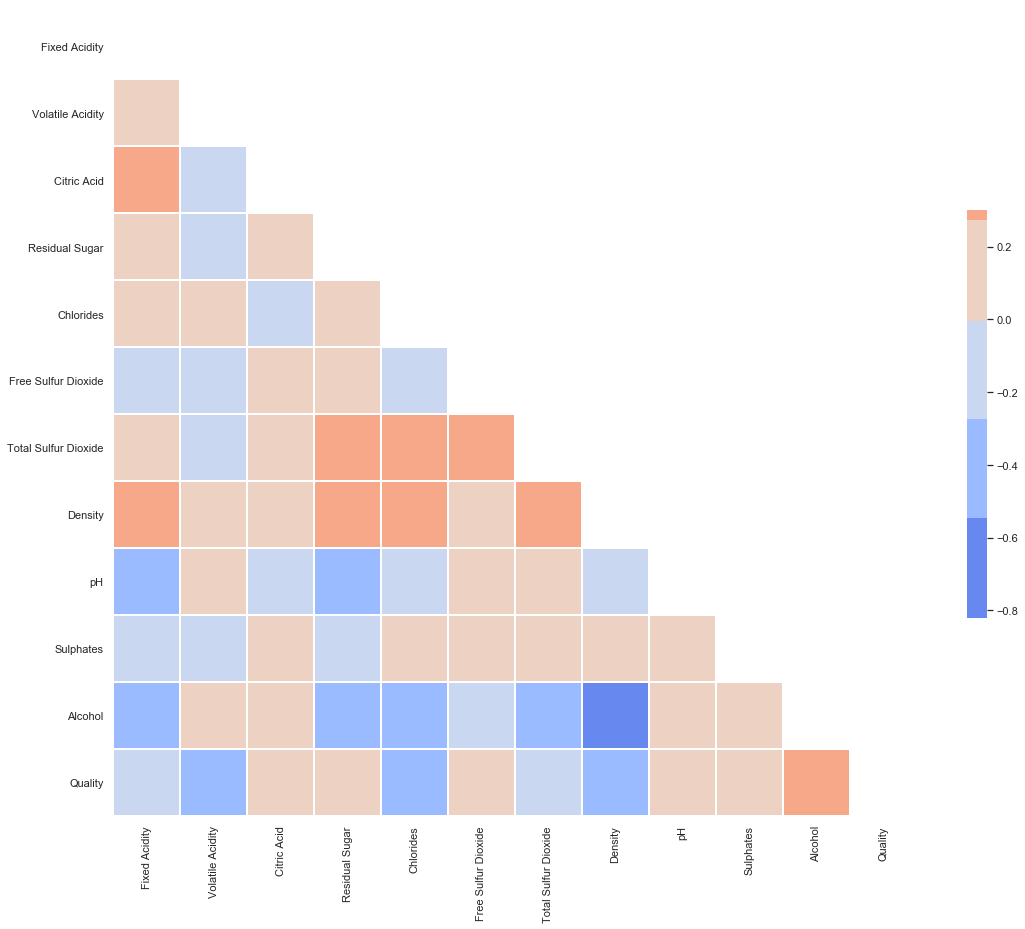

In [84]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
corr = df_small.drop(columns='count').corr()

#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
#cmap = sns.diverging_palette(220, 20, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio:
sns.heatmap(corr, mask=mask, 
            cmap=sns.color_palette("coolwarm"), 
            vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In [85]:
df_small.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality,count
17,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8,1
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8,1
22,6.8,0.26,0.42,1.7,0.049,41.0,122.0,0.9930,3.47,0.48,10.5,8,1
46,6.2,0.45,0.26,4.4,0.063,63.0,206.0,0.9940,3.27,0.52,9.8,4,1
68,6.7,0.23,0.31,2.1,0.046,30.0,96.0,0.9926,3.33,0.64,10.7,8,1


In [86]:
df3 = df_small.drop(columns='count')
df3.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
17,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8
22,6.8,0.26,0.42,1.7,0.049,41.0,122.0,0.9930,3.47,0.48,10.5,8
46,6.2,0.45,0.26,4.4,0.063,63.0,206.0,0.9940,3.27,0.52,9.8,4
68,6.7,0.23,0.31,2.1,0.046,30.0,96.0,0.9926,3.33,0.64,10.7,8


In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(df3)

,variables,VIF
0,Fixed Acidity,81.621815
1,Volatile Acidity,7.625892
2,Citric Acid,10.058512
3,Residual Sugar,3.890628
4,Chlorides,6.717470
5,Free Sulfur Dioxide,5.663242
6,Total Sulfur Dioxide,21.115486
7,Density,1105.676779
8,pH,659.776439
9,Sulphates,16.446658


In [88]:
df3 = df3.drop(columns = "Density")
calc_vif(df3)

,variables,VIF
0,Fixed Acidity,43.905893
1,Volatile Acidity,7.612200
2,Citric Acid,9.968750
3,Residual Sugar,3.363762
4,Chlorides,6.238414
5,Free Sulfur Dioxide,5.615567
6,Total Sulfur Dioxide,20.792911
7,pH,141.467823
8,Sulphates,16.380741
9,Alcohol,116.970238


In [89]:
df3 = df3.drop(columns = "pH")
calc_vif(df3)

,variables,VIF
0,Fixed Acidity,37.915207
1,Volatile Acidity,7.598814
2,Citric Acid,9.711097
3,Residual Sugar,3.362770
4,Chlorides,5.971319
5,Free Sulfur Dioxide,5.579228
6,Total Sulfur Dioxide,19.340862
7,Sulphates,15.119468
8,Alcohol,61.600695
9,Quality,16.781647


In [90]:
df3 = df3.drop(columns = "Fixed Acidity")
calc_vif(df3)

,variables,VIF
0,Volatile Acidity,7.509595
1,Citric Acid,8.332047
2,Residual Sugar,3.255082
3,Chlorides,5.746389
4,Free Sulfur Dioxide,5.475145
5,Total Sulfur Dioxide,18.613255
6,Sulphates,15.069555
7,Alcohol,45.975229
8,Quality,16.263488


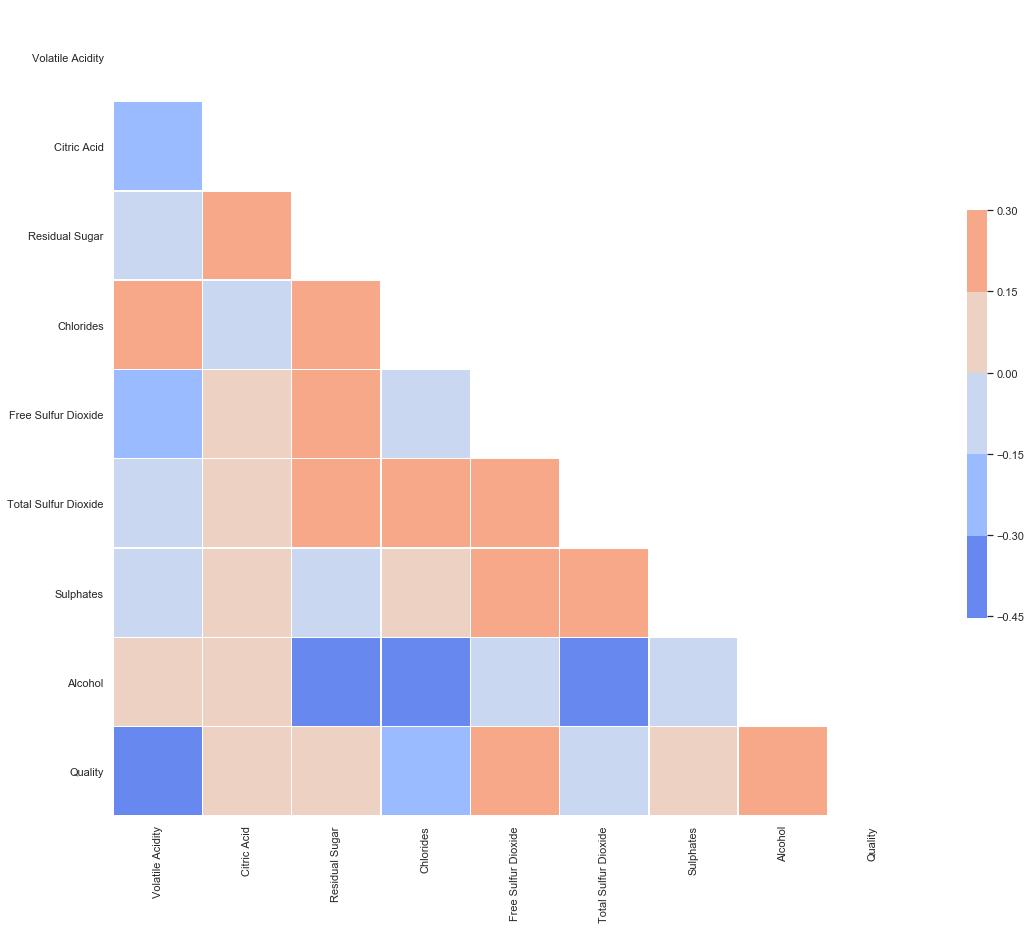

In [91]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
corr = df3.corr()

#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap = sns.color_palette("coolwarm")

#Draw the heatmap with the mask and correct aspect ratio:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

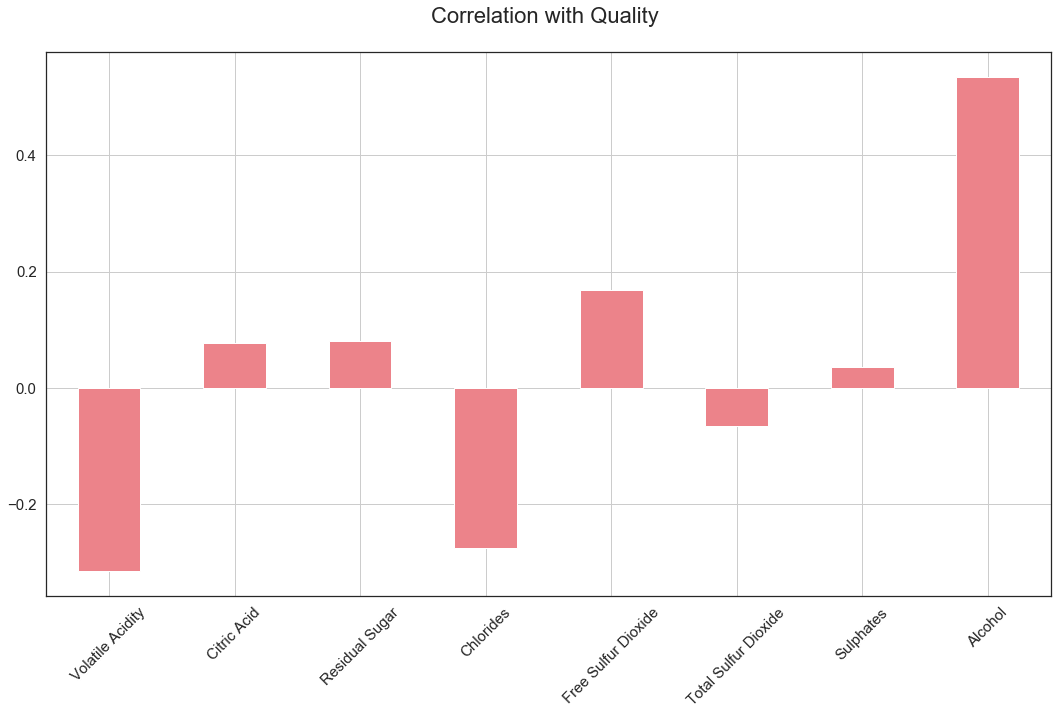

In [93]:
#Plot positive & negative correlations
correlations = df3.corrwith(df.Quality)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Quality \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.show()

# Part 3: Model Selection

In [96]:
    
response = df3["Quality"]
dataset = df3

In [97]:
# Generate training and test datasets of dependent and independent variables
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    stratify=response, 
                                                    test_size = 0.3, #use 0.9 if data is huge.
                                                    random_state = 0)


#### Manual

In [98]:
model = svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.8073394495412844

#### Manual with cross validation

In [99]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm.SVC(kernel='rbf',C=30,gamma='auto'),dataset, response, cv=5)

array([0.73972603, 0.68493151, 0.60273973, 0.68055556, 0.70833333])

In [100]:
#***SLOW!!!***
cross_val_score(svm.SVC(kernel='linear',C=30,gamma='auto'),dataset, response, cv=5)

array([1., 1., 1., 1., 1.])

In [101]:
# loop via options - like manual change of parameters ***SLOW!!!***

kernels = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),dataset, response, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores

{'rbf_1': 0.6860350076103501,
 'rbf_10': 0.6832572298325723,
 'rbf_20': 0.6832572298325723,
 'linear_1': 1.0,
 'linear_10': 1.0,
 'linear_20': 1.0}

#### Manual with cross validation

In [102]:
# BUILD IN FUNCTION - MIGHT BE SLOW AS WELL

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(dataset, response)

df4 = pd.DataFrame(clf.cv_results_)

df4[['param_C','param_kernel','mean_test_score']]

dir(clf)

clf.best_params_


{'C': 1, 'kernel': 'linear'}

In [105]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(dataset, response)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,20,rbf,0.683257
1,20,linear,1.000000
